# Emily Harvey

## Research question/interests

It would be cool to see how much of the money made overall in Canada had to do with tourism from BC and the breakdown of which categories within tourism BC makes the most money in. As well as overall growth of tourism in Canada and BC from 2014-2017.

In [48]:
import pandas as pd 
pd.read_csv('../data/raw/tourism.csv')

,REF_DATE,GEO,DGUID,Indicators,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A11124,Total domestic supply,Total tourism expenditures,Dollars,81,millions,6,v1001801179,1.1.1,3654954.0,NaN,NaN,NaN,1
1,2014,Canada,2016A11124,Total domestic supply,Total tourism products,Dollars,81,millions,6,v1001801180,1.1.2,212829.4,NaN,NaN,NaN,1
2,2014,Canada,2016A11124,Total domestic supply,Total transportation,Dollars,81,millions,6,v1001801181,1.1.3,98108.0,NaN,NaN,NaN,1
3,2014,Canada,2016A11124,Total domestic supply,Passenger air transport,Dollars,81,millions,6,v1001801182,1.1.4,19961.5,NaN,NaN,NaN,1
4,2014,Canada,2016A11124,Total domestic supply,Passenger rail transport,Dollars,81,millions,6,v1001801183,1.1.5,309.6,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8955,2017,Nunavut,2016A000262,Tourism product ratio,Total other products,Percentage,242,millions,6,v1001805466,14.10.28,0.2,NaN,NaN,NaN,1
8956,2017,Nunavut,2016A000262,Tourism product ratio,Groceries,Percentage,242,millions,6,v1001805467,14.10.29,8.4,NaN,NaN,NaN,1
8957,2017,Nunavut,2016A000262,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,242,millions,6,v1001805468,14.10.30,9.0,NaN,NaN,NaN,1
8958,2017,Nunavut,2016A000262,Tourism product ratio,Urban transit and parking,Percentage,242,millions,6,v1001805469,14.10.31,NaN,..,NaN,NaN,1


## Milestone 3:
### Task 1: EDA

In [49]:
#Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno
import pandas as pd 
%matplotlib inline

In [50]:
df = pd.read_csv('../data/raw/tourism.csv')

# Simple Preview and Stats of Data
# Shows column names, non-null count, and Dtype
# Shows us that columns 13 and 14 only have null numbers and need to be deleted.
# Also shows that the most common Dtype in our data are objects
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8960 entries, 0 to 8959
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       8960 non-null   int64  
 1   GEO            8960 non-null   object 
 2   DGUID          8960 non-null   object 
 3   Indicators     8960 non-null   object 
 4   Products       8960 non-null   object 
 5   UOM            8960 non-null   object 
 6   UOM_ID         8960 non-null   int64  
 7   SCALAR_FACTOR  8960 non-null   object 
 8   SCALAR_ID      8960 non-null   int64  
 9   VECTOR         8960 non-null   object 
 10  COORDINATE     8960 non-null   object 
 11  VALUE          7521 non-null   float64
 12  STATUS         1439 non-null   object 
 13  SYMBOL         0 non-null      float64
 14  TERMINATED     0 non-null      float64
 15  DECIMALS       8960 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


,REF_DATE,GEO,DGUID,Indicators,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A11124,Total domestic supply,Total tourism expenditures,Dollars,81,millions,6,v1001801179,1.1.1,3654954.0,NaN,NaN,NaN,1
1,2014,Canada,2016A11124,Total domestic supply,Total tourism products,Dollars,81,millions,6,v1001801180,1.1.2,212829.4,NaN,NaN,NaN,1
2,2014,Canada,2016A11124,Total domestic supply,Total transportation,Dollars,81,millions,6,v1001801181,1.1.3,98108.0,NaN,NaN,NaN,1
3,2014,Canada,2016A11124,Total domestic supply,Passenger air transport,Dollars,81,millions,6,v1001801182,1.1.4,19961.5,NaN,NaN,NaN,1
4,2014,Canada,2016A11124,Total domestic supply,Passenger rail transport,Dollars,81,millions,6,v1001801183,1.1.5,309.6,NaN,NaN,NaN,1


In [51]:
# summary stats table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_DATE,8960.0,2015.500000,1.500084,2014.0,2014.0,2015.5,2017.0,2017.0
UOM_ID,8960.0,97.100000,48.302696,81.0,81.0,81.0,81.0,242.0
SCALAR_ID,8960.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
VALUE,7521.0,6809.351509,112809.280902,0.0,5.6,37.9,239.6,3910989.7
SYMBOL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TERMINATED,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DECIMALS,8960.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0



Preview of data with null values:

   REF_DATE     GEO       DGUID             Indicators  \
0      2014  Canada  2016A11124  Total domestic supply   
1      2014  Canada  2016A11124  Total domestic supply   
2      2014  Canada  2016A11124  Total domestic supply   
3      2014  Canada  2016A11124  Total domestic supply   
4      2014  Canada  2016A11124  Total domestic supply   

                     Products      UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID  \
0  Total tourism expenditures  Dollars      81      millions          6   
1      Total tourism products  Dollars      81      millions          6   
2        Total transportation  Dollars      81      millions          6   
3     Passenger air transport  Dollars      81      millions          6   
4    Passenger rail transport  Dollars      81      millions          6   

        VECTOR COORDINATE      VALUE STATUS  SYMBOL  TERMINATED  DECIMALS  
0  v1001801179      1.1.1  3654954.0    NaN     NaN         NaN         1  
1  v10018011

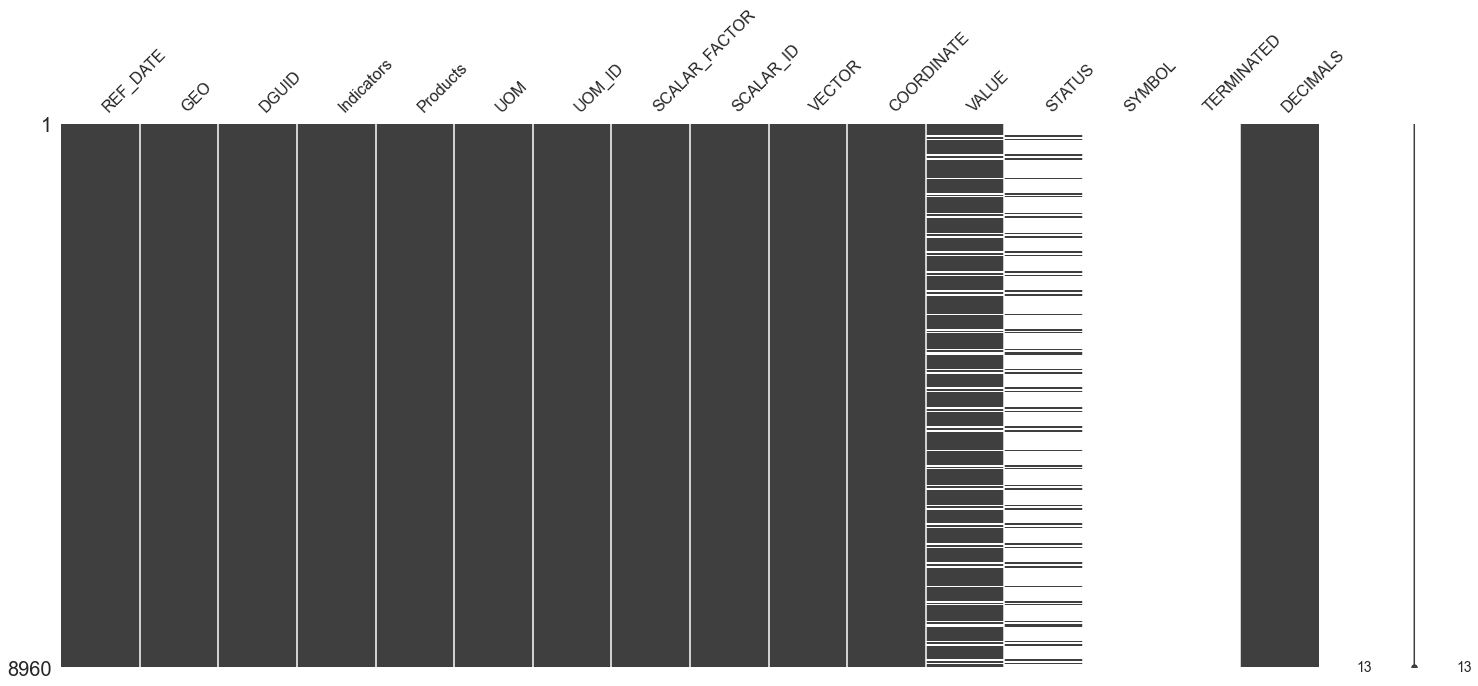

In [52]:
# generate preview of entries with null values
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\n")
    print(df[df.isnull().any(axis=1)].head(5))
    missingno.matrix(df)
    plt.show()

# Shows us that there are only null values in the SYMBOL & TERMINATED columns and many null values in the STATUS and VALUE columns
# Both the status, symbol, & terminated columns are not being used in the analysis so can be deleted as well
# We also need to get rid of the rows with the unknown values

In [53]:
#checking for duplicated entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [54]:
#tells us how many unique values there are in our dataframe
df.nunique(axis=0)

#further helps us decide which columns to get rid of as they are not useful

REF_DATE            2
GEO                14
DGUID              14
Indicators         10
Products           32
UOM                 2
UOM_ID              2
SCALAR_FACTOR       1
SCALAR_ID           1
VECTOR           4480
COORDINATE       4480
VALUE            3147
STATUS              1
SYMBOL              0
TERMINATED          0
DECIMALS            1
dtype: int64

In [55]:
#looking at the unique values of the products
df.Products.unique()
#gives us a list of the values in the products column

array(['Total tourism expenditures', 'Total tourism products',
       'Total transportation', 'Passenger air transport',
       'Passenger rail transport', 'Passenger water transport',
       'Interurban, charter and tour bus transport', 'Taxis',
       'Vehicle rental', 'Vehicle repairs and parts', 'Vehicle fuel',
       'Total accommodation', 'Hotels', 'Motels', 'Camping',
       'Other accommodation', 'Total food and beverage services',
       'Meals from accommodation', 'Meals from restaurants',
       'Alcoholic beverages from accommodation',
       'Alcoholic beverages from restaurants',
       'Meals and alcoholic beverages from other tourism industries',
       'Total other tourism products', 'Recreation and entertainment',
       'Travel services', 'Convention fees', 'Pre-trip expenses',
       'Total other products', 'Groceries',
       'Beer, wine, and liquor from stores', 'Urban transit and parking',
       'Miscellaneous products'], dtype=object)

In [56]:
#looking at the unique values of the indicators
df.Indicators.unique()
#gives us a list of the values in the indicators column

array(['Total domestic supply', 'Total demand', 'Domestic demand',
       'Exports', 'Interprovincial demand (exports)',
       'International demand (exports)', 'Imports',
       'Interprovincial imports', 'International imports',
       'Tourism product ratio'], dtype=object)

In [57]:
#looking at the unique values of the geo
df.GEO.unique()
#gives us a list of the values in the geo column
#helps us see which rows we want to get rid of as we only want to study BC and Canada

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut'], dtype=object)

In [58]:
sns.set_theme(style="ticks",
              font_scale=1
             )
plt.rc("axes.spines", top=False, right=False)

<AxesSubplot:xlabel='Location and Year', ylabel='Dollars (in millions)'>

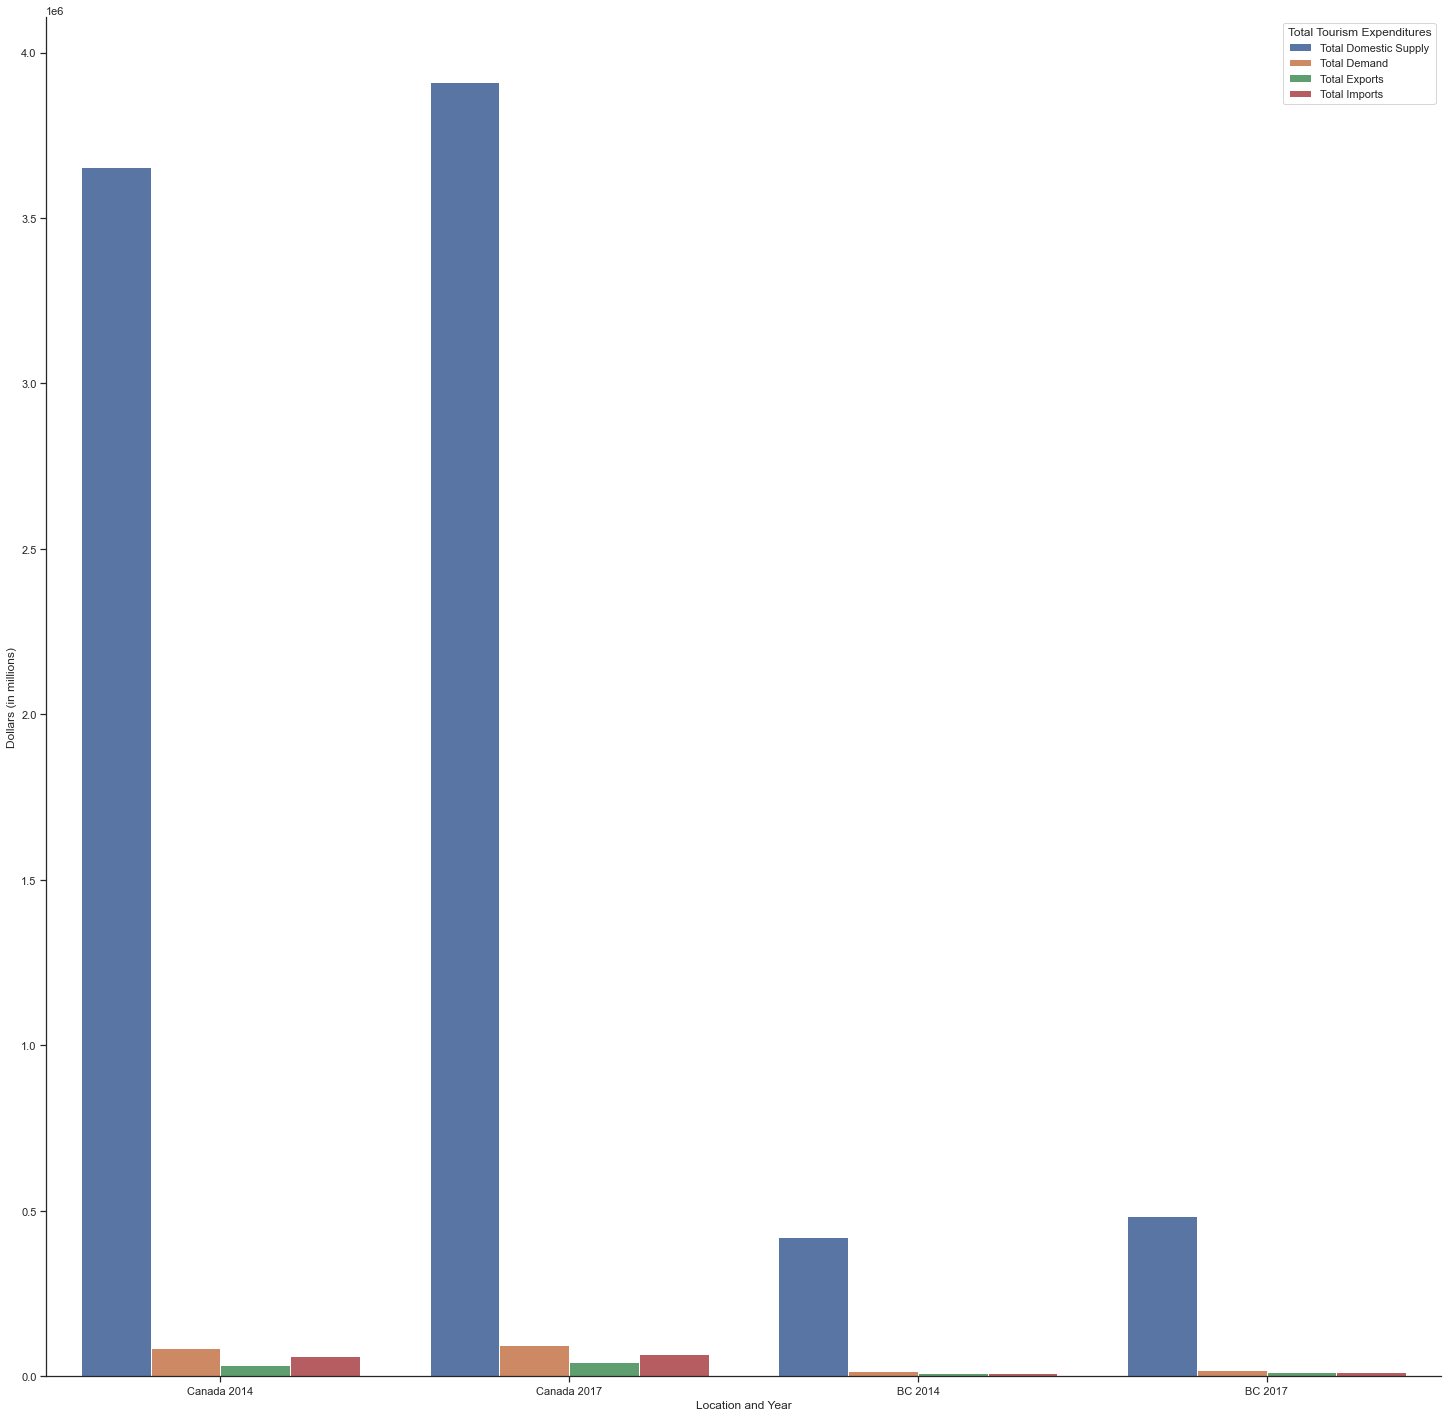

In [59]:

totalDomesticSupply = [3654954, 3910989.7, 421110.5, 483396]
totalDemand = [84580.6, 95998, 15570.4, 19541.5]
totalExports = [32668.7, 42535.5, 8801.2, 11839]
totalImports = [60274.6, 67791.4, 10269.8, 11689.5]
fig, ax = plt.subplots(figsize=(25, 25))
new_df = pd.DataFrame([['Total Domestic Supply', 'Canada 2014', 3654954], 
                       ['Total Domestic Supply', 'Canada 2017', 3910989.7],
                       ['Total Domestic Supply', 'BC 2014', 421110.5],
                       ['Total Domestic Supply', 'BC 2017', 483396],
                       ['Total Demand', 'Canada 2014', 84580.6],
                       ['Total Demand', 'Canada 2017', 95998],
                       ['Total Demand', 'BC 2014', 15570.4],
                       ['Total Demand', 'BC 2017', 19541.5],
                       ['Total Exports', 'Canada 2014', 32668.7],
                       ['Total Exports', 'Canada 2017', 42535.5],
                       ['Total Exports', 'BC 2014', 8801.2],
                       ['Total Exports', 'BC 2017', 11839],
                       ['Total Imports', 'Canada 2014', 60274.6],
                       ['Total Imports', 'Canada 2017', 67791.4],
                       ['Total Imports','BC 2014',10269.8],
                       ['Total Imports','BC 2017',11689.5]], columns=['Total Tourism Expenditures', 'Location and Year', 'Dollars (in millions)'])
sns.barplot(data=new_df, x='Location and Year', y='Dollars (in millions)', hue='Total Tourism Expenditures')
# this graph would be better by splitting it into seperate graphs in order to see the values better

<AxesSubplot:xlabel='Location and Year', ylabel='Dollars (in millions)'>

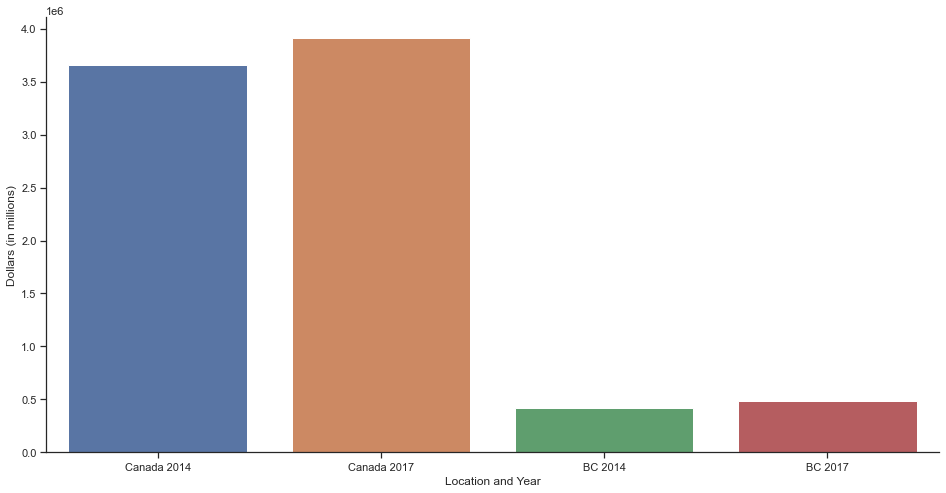

In [60]:
TotalDomesticSupplyDf = pd.DataFrame([[ 'Canada 2014', 3654954], 
                       ['Canada 2017', 3910989.7],
                       ['BC 2014', 421110.5],
                       ['BC 2017', 483396]], columns=['Location and Year', 'Dollars (in millions)'])
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=TotalDomesticSupplyDf, x='Location and Year', y='Dollars (in millions)')
#find a way to add a title

<AxesSubplot:xlabel='Location and Year', ylabel='Dollars (in millions)'>

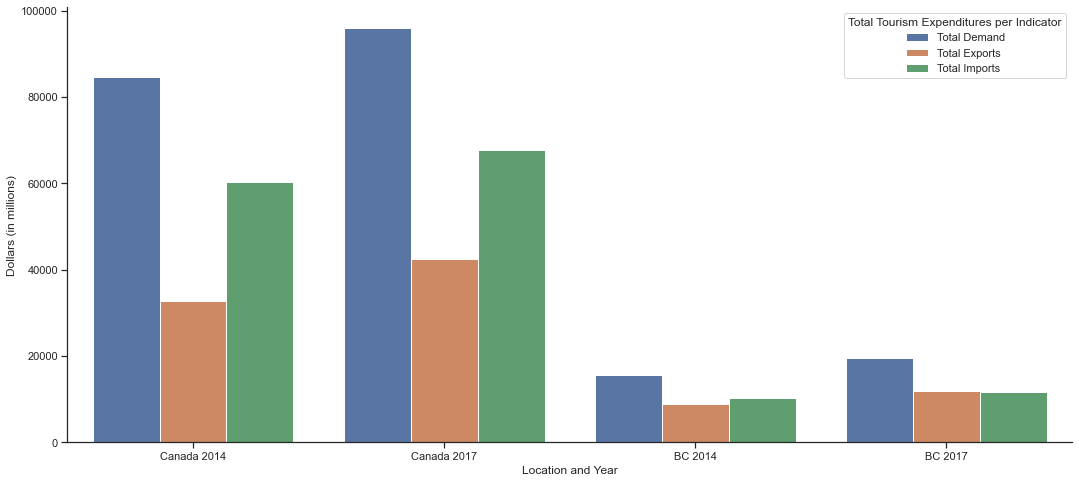

In [61]:
fig, ax = plt.subplots(figsize=(18, 8))
new_df = pd.DataFrame([['Total Demand', 'Canada 2014', 84580.6],
                       ['Total Demand', 'Canada 2017', 95998],
                       ['Total Demand', 'BC 2014', 15570.4],
                       ['Total Demand', 'BC 2017', 19541.5],
                       ['Total Exports', 'Canada 2014', 32668.7],
                       ['Total Exports', 'Canada 2017', 42535.5],
                       ['Total Exports', 'BC 2014', 8801.2],
                       ['Total Exports', 'BC 2017', 11839],
                       ['Total Imports', 'Canada 2014', 60274.6],
                       ['Total Imports', 'Canada 2017', 67791.4],
                       ['Total Imports','BC 2014',10269.8],
                       ['Total Imports','BC 2017',11689.5]], columns=['Total Tourism Expenditures per Indicator', 'Location and Year', 'Dollars (in millions)'])
sns.barplot(data=new_df, x='Location and Year', y='Dollars (in millions)', hue='Total Tourism Expenditures per Indicator')

<AxesSubplot:xlabel='Total Tourism Expenditures per Indicator', ylabel='Dollars (in millions)'>

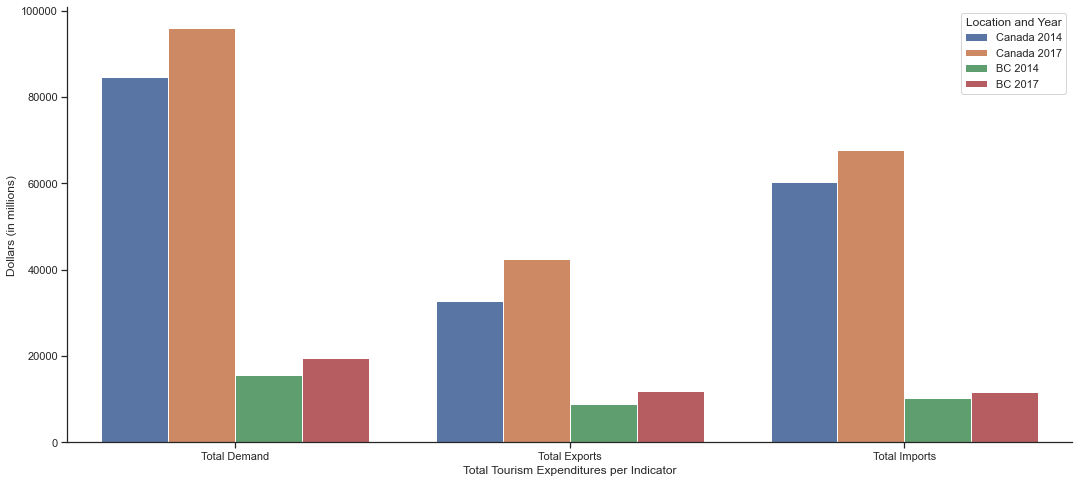

In [62]:
fig, ax = plt.subplots(figsize=(18, 8))
new_df = pd.DataFrame([['Canada 2014','Total Demand', 84580.6],
                       ['Canada 2017','Total Demand', 95998],
                       ['BC 2014', 'Total Demand', 15570.4],
                       ['BC 2017','Total Demand',  19541.5],
                       ['Canada 2014','Total Exports', 32668.7],
                       ['Canada 2017','Total Exports', 42535.5],
                       ['BC 2014','Total Exports', 8801.2],
                       ['BC 2017', 'Total Exports',11839],
                       ['Canada 2014','Total Imports',  60274.6],
                       ['Canada 2017','Total Imports', 67791.4],
                       ['BC 2014','Total Imports', 10269.8],
                       ['BC 2017','Total Imports', 11689.5]], columns=['Location and Year','Total Tourism Expenditures per Indicator', 'Dollars (in millions)'])
sns.barplot(data=new_df, x='Total Tourism Expenditures per Indicator', y='Dollars (in millions)', hue='Location and Year')
# shows the difference between years better

### Task 2: Analysis Pipeline

#### Load in data

In [63]:
df = pd.read_csv('../data/raw/tourism.csv')
df

,REF_DATE,GEO,DGUID,Indicators,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A11124,Total domestic supply,Total tourism expenditures,Dollars,81,millions,6,v1001801179,1.1.1,3654954.0,NaN,NaN,NaN,1
1,2014,Canada,2016A11124,Total domestic supply,Total tourism products,Dollars,81,millions,6,v1001801180,1.1.2,212829.4,NaN,NaN,NaN,1
2,2014,Canada,2016A11124,Total domestic supply,Total transportation,Dollars,81,millions,6,v1001801181,1.1.3,98108.0,NaN,NaN,NaN,1
3,2014,Canada,2016A11124,Total domestic supply,Passenger air transport,Dollars,81,millions,6,v1001801182,1.1.4,19961.5,NaN,NaN,NaN,1
4,2014,Canada,2016A11124,Total domestic supply,Passenger rail transport,Dollars,81,millions,6,v1001801183,1.1.5,309.6,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8955,2017,Nunavut,2016A000262,Tourism product ratio,Total other products,Percentage,242,millions,6,v1001805466,14.10.28,0.2,NaN,NaN,NaN,1
8956,2017,Nunavut,2016A000262,Tourism product ratio,Groceries,Percentage,242,millions,6,v1001805467,14.10.29,8.4,NaN,NaN,NaN,1
8957,2017,Nunavut,2016A000262,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,242,millions,6,v1001805468,14.10.30,9.0,NaN,NaN,NaN,1
8958,2017,Nunavut,2016A000262,Tourism product ratio,Urban transit and parking,Percentage,242,millions,6,v1001805469,14.10.31,NaN,..,NaN,NaN,1


#### Clean Data

In [64]:
#remove unwanted columns
df_cleaned = df.drop(['DGUID','UOM_ID','SCALAR_ID','VECTOR', 'COORDINATE', 'STATUS','SYMBOL','TERMINATED', 'DECIMALS'],axis=1)

In [65]:
#remove unwanted rows
df_cleaned = df_cleaned[df_cleaned['GEO'].isin(['Canada','British Columbia'])]
df_cleaned = df_cleaned[df_cleaned['SCALAR_FACTOR'].isin(['millions'])]

In [66]:
#remove rows with null values
df_cleaned = df_cleaned.dropna(axis=0)

#### Process Data

#### Wrangle Data

In [67]:
df_cleaned = df_cleaned.rename(columns = {'REF_DATE':'Year', 'GEO': 'Geography', 'SCALAR_FACTOR': 'Scalar factor', 'VALUE':'Value' })
df_cleaned

,Year,Geography,Indicators,Products,UOM,Scalar factor,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6
...,...,...,...,...,...,...,...
7995,2017,British Columbia,Tourism product ratio,Total other products,Percentage,millions,0.6
7996,2017,British Columbia,Tourism product ratio,Groceries,Percentage,millions,7.0
7997,2017,British Columbia,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,millions,7.2
7998,2017,British Columbia,Tourism product ratio,Urban transit and parking,Percentage,millions,7.6


### Task 3: Method Chain

#### Step 1

In [68]:
df = (
    pd.read_csv("../data/raw/tourism.csv")
    .drop(columns=['DGUID','UOM_ID','SCALAR_ID','VECTOR', 'COORDINATE', 'STATUS','SYMBOL','TERMINATED', 'DECIMALS'],axis=1)
    .dropna()
    .query("GEO != ['Nunavut', 'Northwest Territories','Yukon','Newfoundland and Labrador','Prince Edward Island','Nova Scotia','New Brunswick','Quebec','Ontario','Manitoba','Saskatchewan', 'Alberta']")
    .query("SCALAR_FACTOR != ['Percentage']")
    .rename(columns={"REF_DATE":"Year", "GEO":"Location", "SCALAR_FACTOR":"Scalar Factor", "VALUE":"Value"})
)

#### Step 2

In [71]:
def load_and_process(url_or_path_to_csv_file):
    # Method Chain 1
    df = (
        pd.read_csv(url_or_path_to_csv_file)
        .drop(columns=['DGUID','UOM_ID','SCALAR_ID','VECTOR', 'COORDINATE', 'STATUS','SYMBOL','TERMINATED', 'DECIMALS'],axis=1)
        .dropna()
        .query("GEO != ['Nunavut', 'Northwest Territories','Yukon','Newfoundland and Labrador','Prince Edward Island','Nova Scotia','New Brunswick','Quebec','Ontario','Manitoba','Saskatchewan', 'Alberta']")
        .query("SCALAR_FACTOR != ['Percentage']")
        .rename(columns={"REF_DATE":"Year", "GEO":"Location", "SCALAR_FACTOR":"Scalar Factor", "VALUE":"Value"})
        )
    return df

In [72]:
load_and_process('../data/raw/tourism.csv')

,Year,Location,Indicators,Products,UOM,Scalar Factor,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6
...,...,...,...,...,...,...,...
7995,2017,British Columbia,Tourism product ratio,Total other products,Percentage,millions,0.6
7996,2017,British Columbia,Tourism product ratio,Groceries,Percentage,millions,7.0
7997,2017,British Columbia,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,millions,7.2
7998,2017,British Columbia,Tourism product ratio,Urban transit and parking,Percentage,millions,7.6


#### Step 3

In [73]:
import project_functions1
df = project_functions1.load_and_process("../data/raw/tourism.csv")
df

,Year,Location,Indicators,Products,UOM,Scalar Factor,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6
...,...,...,...,...,...,...,...
7995,2017,British Columbia,Tourism product ratio,Total other products,Percentage,millions,0.6
7996,2017,British Columbia,Tourism product ratio,Groceries,Percentage,millions,7.0
7997,2017,British Columbia,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,millions,7.2
7998,2017,British Columbia,Tourism product ratio,Urban transit and parking,Percentage,millions,7.6


In [74]:
df_cleaned.to_csv('emily_cleaned_data.csv')

### Task 4: Conduct your analysis